In [49]:
import numpy as np
import matplotlib.pyplot as plt




In [97]:
def upwind(u, C):
    
    Nt = u.shape[0]
    Nx = u.shape[1]-1
    
    u_n = np.zeros((Nx+1))
    u_n = u[0,:]

    for n in range(0, Nt-1):
        for i in range(1, Nx):
            u[n+1,i] = u_n[i] - C*(u_n[i] - u_n[i-1])

        # periodic BC
        
        u[n+1,0]  = u[n+1,Nx-1]
        u[n+1,Nx] = u[n+1,1]
        
        # Switch variables before next step
        u_n = u[n+1,:]
        
    return u
        
def fitcis(u, C):
    
    Nt = u.shape[0]
    Nx = u.shape[1]
    
    u_n = np.zeros((Nx))
    u_n = u[0,:]

    for n in range(0, Nt):
        for i in range(1, Nx-1):
            u[n+1,i] = u_n[i] - 0.5*C*(u_n[i+1] - u_n[i-1])

        # periodic BC
        
        u[n+1,0]  = u[n+1,Nx-1]
        u[n+1,Nx] = u[n+1,1]
        
        # Switch variables before next step
        u_n = u[n+1,:]
        
    return u



In [108]:

def solver(I, U0, v, L, dt, C, T, user_action=None, scheme=None):
    
    Nt = int(round(T/float(dt)))
    t = np.linspace(0, Nt*dt, Nt+1)   # Mesh points in time
    dx = v*dt/C
    Nx = int(round(L/dx))
    x = np.linspace(0, L, Nx+1)       # Mesh points in space
    # Make sure dx and dt are compatible with x and t
    dx = x[1] - x[0]
    dt = t[1] - t[0]
    C = v*dt/dx

    u_old = np.zeros((Nt+1,Nx+1))

    # Set initial condition u(x,0) = I(x)
    for i in range(0, Nx+1):
        u_old[0,i] = I(x[i])

    if user_action is not None:
        user_action(u_old[0], x, t, 0)
        
    if scheme is not None:
        u = scheme(u_old, C)

    for n in range(1, Nt):
        
        if user_action is not None:
            user_action(u[n], x, t, n)

In [109]:
def run(case='gaussian'):
    """Special function for the FECS case."""
    if case == 'gaussian':
        def I(x):
            return np.exp(-0.5*((x-L/10)/sigma)**2)
    else:
        def I(x):
            return np.cos(np.pi*5/L*(x - L/10)) if x < L/5 else 0

    L = 1.0
    sigma = 0.02
    legends = []
    
    def plot(u, x, t, n):
        """Animate and plot every m steps in the same figure."""
        plt.figure(1)
        if n == 0:
            lines = plt.plot(x, u)
        else:
            lines = plt.plot(x, u) #set_ydata(u)
            plt.draw()
            #plt.savefig()
        plt.figure(2)
        m = 25
        if n % m != 0:
            return
        print( 't=%g, n=%d, u in [%g, %g] w/%d points' % (t[n], n, u.min(), u.max(), x.size) )
        if np.abs(u).max() > 3:  # Instability?
            return
        plt.plot(x, u)
        legends.append('t=%g' % t[n])

    plt.ion()
    dt = 0.01
    C  = 0.5
    T  = 1.0

    solver(I=I, U0=U0, v=1.0, L=L, dt=dt, C=C, T=T, user_action=plot, scheme=upwind)
        
    plt.legend(legends, loc='lower left')
    plt.savefig('tmp.png'); plt.savefig('tmp.pdf')
    plt.axis([0, L, -0.75, 1.1])
    plt.show()

t=0, n=0, u in [0, 1] w/51 points
t=0.25, n=25, u in [0, 0.736821] w/51 points
t=0.5, n=50, u in [7.91278e-10, 0.602513] w/51 points
t=0.75, n=75, u in [8.85625e-07, 0.515368] w/51 points


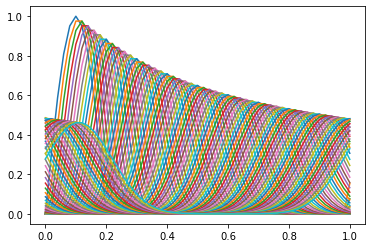

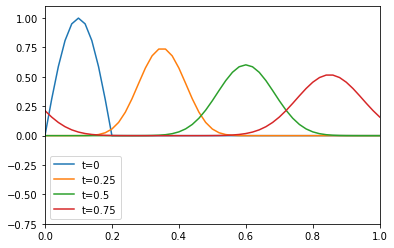

In [110]:
run(case='t')
